<a href="https://colab.research.google.com/github/Shridharshini2005/PRODIGY_DS_05/blob/main/road_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 05:**

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of the day. Visualize accident hotspots and contributing factors.

Dataset obtained from: https://www.kaggle.com/datasets/data125661/india-road-accident-dataset/data

Importing the required libraries:

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Uploading the dataset:

In [3]:
df = pd.read_csv("/content/sample_data/AccidentsBig.csv")

/tmp/ipython-input-3-1666310373.py:1: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/AccidentsBig.csv")


In [4]:
df.head()

Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week   Time  \
0                 1.0                   1.0          3.0  17:42   
1                 1.0                   1.0          4.0  17:36   
2                 2.0                   1.0          5.0  00:15   
3                 1.0                   1.0          6.0  10:35   
4                 1.0                   1.0          2.0  21:13   

   Local_Authority_(District)  ... Pedestrian_Crossing-Physical_Facilities  \
0                        12.0  ...                                     1.0   
1                        12.0  ...                                     5.0   
2                        12.0  ...                                     0.0   
3                        12.0  ...                                     0.0   
4                        12.0  ...                                     0.0   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0               1.0                 2.0                      2.0   
1               4.0                 1.0                      1.0   
2               4.0                 1.0                      1.0   
3               1.0                 1.0                      1.0   
4               7.0                 1.0                      2.0   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                         0.0                  0.0                  1.0   
1                         0.0                  0.0                  1.0   
2                         0.0                  0.0                  1.0   
3                         0.0                  0.0                  1.0   
4                         0.0                  0.0                  1.0   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                          1.0                  E01002849   
1                                          1.0                  E01002909   
2                                          1.0                  E01002857   
3                                          1.0                  E01002840   
4                                          1.0                  E01002863   

         Date  
0  04-01-2018  
1  05-01-2018  
2  06-01-2018  
3  07-01-2018  
4  10-01-2018  

[5 rows x 30 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  float64
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  float64
 4   Accident_Severity                            59998 non-null  float64
 5   Number_of_Vehicles                           59998 non-null  float64
 6   Number_of_Casualties                         59998 non-null  float64
 7   Day_of_Week                                  59998 non-null  float64
 8   Time                                         59997 non-null  object 
 9   Local_Authority_(District)                   59998 non-null  float64

In [6]:
df.describe()

Accident_Index     longitude      latitude  Police_Force  \
count    59998.000000  59998.000000  59998.000000  59998.000000   
mean     29999.500000     78.098483     22.083749      4.304360   
std      17320.075062      5.949539      5.655470      4.569113   
min          1.000000     69.015103      8.864429      1.000000   
25%      15000.250000     73.895816     18.555476      1.000000   
50%      29999.500000     77.050768     22.732800      4.000000   
75%      44998.750000     78.544677     27.091517      6.000000   
max      59998.000000     94.231931     31.068800     48.000000   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
count       59998.000000        59998.000000          59998.000000   
mean            2.855512            1.832028              1.320761   
std             0.380983            0.692804              0.762099   
min             1.000000            1.000000              1.000000   
25%             3.000000            1.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              1.000000   
max             3.000000           18.000000             23.000000   

        Day_of_Week  Local_Authority_(District)  1st_Road_Class  ...  \
count  59998.000000                59998.000000    59998.000000  ...   
mean       4.124637                   71.151072        3.982183  ...   
std        1.923690                   63.827188        1.360867  ...   
min        1.000000                    1.000000        1.000000  ...   
25%        3.000000                   18.000000        3.000000  ...   
50%        4.000000                   73.000000        3.000000  ...   
75%        6.000000                  107.000000        5.000000  ...   
max        7.000000                  570.000000        6.000000  ...   

       2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
count     59998.000000                       59998.000000   
mean        330.956232                           0.006184   
std        1185.561831                           0.102529   
min          -1.000000                          -1.000000   
25%           0.000000                           0.000000   
50%           0.000000                           0.000000   
75%           0.000000                           0.000000   
max        9711.000000                           2.000000   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
count                             59998.000000      59998.000000   
mean                                  0.856262          1.902713   
std                                   1.896282          1.486875   
min                                  -1.000000          1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   8.000000          7.000000   

       Weather_Conditions  Road_Surface_Conditions  \
count        59998.000000             59998.000000   
mean             1.386846                 1.298377   
std              1.267965                 0.541992   
min              1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 5.000000   

       Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
count                59998.000000         59998.000000         59998.000000   
mean                     0.089236             0.048035             1.185356   
std                      0.644405             0.481461             0.389618   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   

Pre-processing data:

In [7]:
df.isnull().sum()
df=df.dropna()

In [8]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour

/tmp/ipython-input-8-283378201.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


Standardizing categorical data:

In [21]:
df['Weather_Conditions'] = df['Weather_Conditions'].astype(float).astype(int)
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype(float).astype(int)

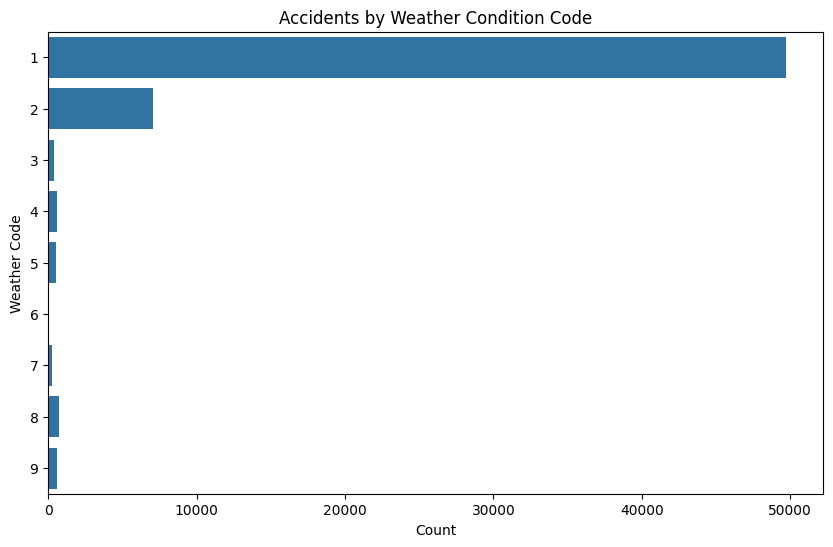

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y='Weather_Conditions', data=df, order=sorted(df['Weather_Conditions'].unique()))
plt.title("Accidents by Weather Condition Code")
plt.xlabel("Count")
plt.ylabel("Weather Code")
plt.show()

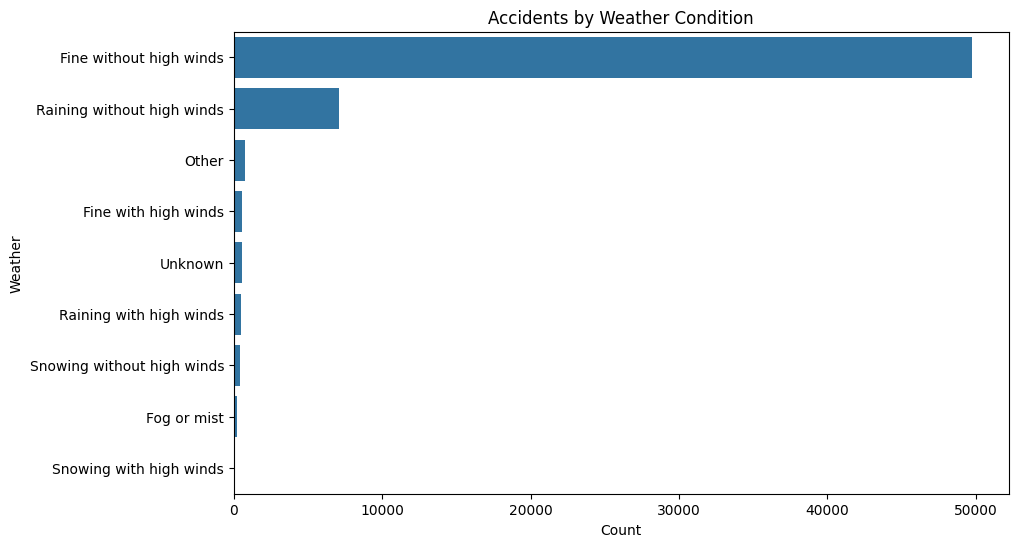

In [19]:
weather_map = {
    1: "Fine without high winds",
    2: "Raining without high winds",
    3: "Snowing without high winds",
    4: "Fine with high winds",
    5: "Raining with high winds",
    6: "Snowing with high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown"
}

df['Weather_Label'] = df['Weather_Conditions'].astype(float).astype(int).map(weather_map)

plt.figure(figsize=(10,6))
sns.countplot(y='Weather_Label', data=df, order=df['Weather_Label'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()

In [22]:
print(df['Road_Surface_Conditions'].unique())

[ 2  1  4  3  5 -1]


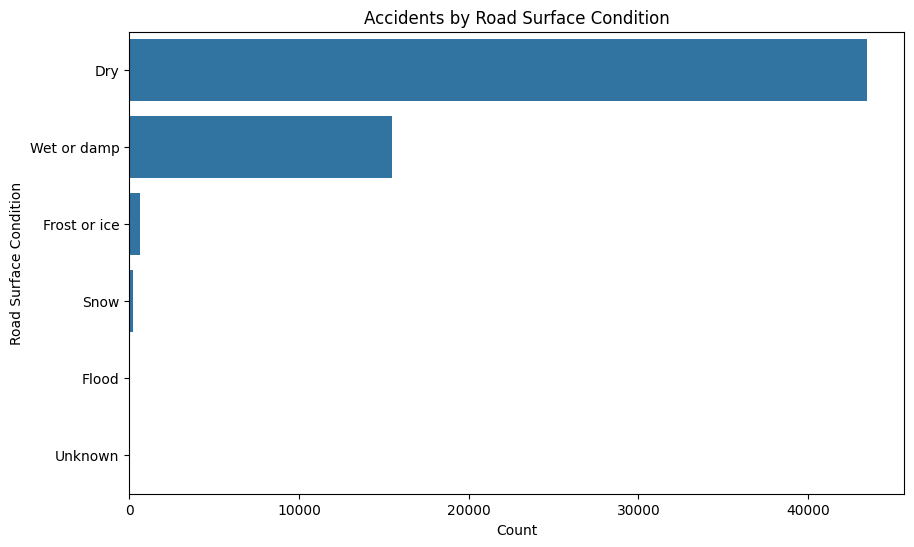

In [23]:
road_surface_map = {
    1: "Dry",
    2: "Wet or damp",
    3: "Snow",
    4: "Frost or ice",
    5: "Flood",
    -1: "Unknown"
}
df['Road_Surface_Label'] = df['Road_Surface_Conditions'].map(road_surface_map)

plt.figure(figsize=(10,6))
sns.countplot(y='Road_Surface_Label', data=df, order=df['Road_Surface_Label'].value_counts().index)
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Count")
plt.ylabel("Road Surface Condition")
plt.show()

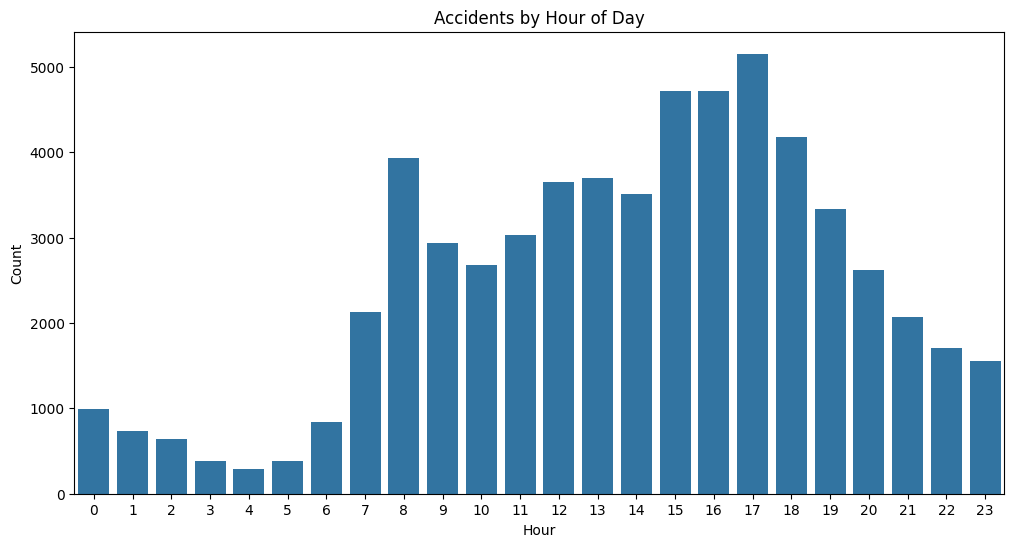

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, order=sorted(df['Hour'].dropna().unique()))
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

Visualizing Accident Hotspots:

In [28]:
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    hover_name='Local_Authority_(District)',
    hover_data=['Weather_Label', 'Road_Surface_Label', 'Accident_Severity'],
    color='Accident_Severity',
    zoom=5,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Accident Hotspots in India")
fig.show()


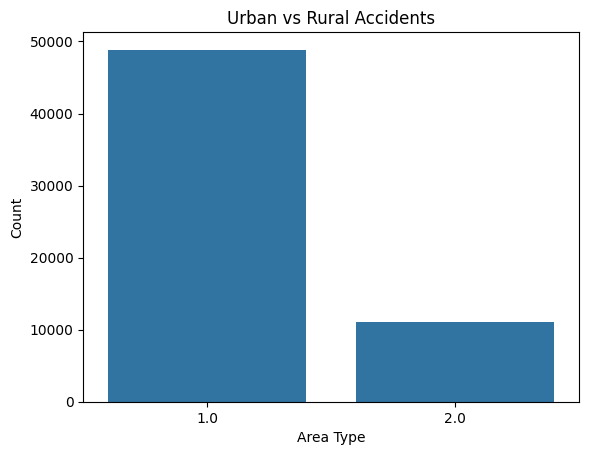

In [34]:
sns.countplot(x="Urban_or_Rural_Area", data=df)
plt.title("Urban vs Rural Accidents")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.show()

In [39]:
print(df['Pedestrian_Crossing-Physical_Facilities'].unique())
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].astype(float).astype(int)
pedestrian_map = {
    0: "No crossing facilities",
    1: "Zebra crossing",
    2: "Light-controlled crossing",
    3: "Non-light-controlled crossing",
    -1: "Unknown"
}
df['Pedestrian_Crossing_Label'] = df['Pedestrian_Crossing-Physical_Facilities'].map(pedestrian_map)

[ 1  5  0  8  4  7 -1]


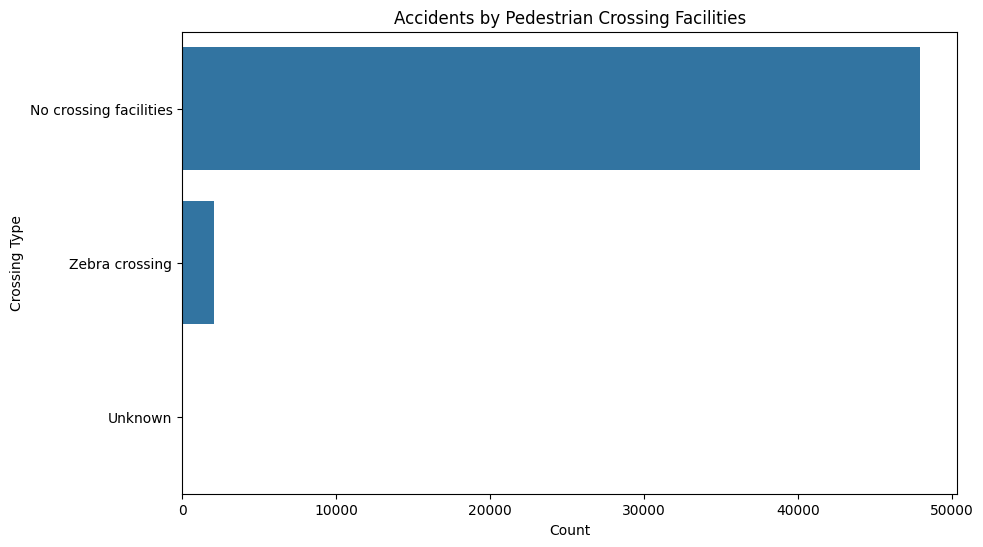

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(y='Pedestrian_Crossing_Label', data=df, order=df['Pedestrian_Crossing_Label'].value_counts().index)
plt.title("Accidents by Pedestrian Crossing Facilities")
plt.xlabel("Count")
plt.ylabel("Crossing Type")
plt.show()

Conclusion:

1. Most accidents occurred on dry roads, which is expected since the majority of driving happens in dry conditions.

2. Weather conditions showed clear trends, with fine weather contributing to more total accidents, but wet and foggy conditions potentially increasing severity.

3. Accident rates are more where there are no crossing facilities than where zebra crossings are available.

4. Road surface conditions and weather combined highlight that while adverse Conditions that reduce driving frequency can still pose a higher per-trip risk.